# Data Prep for Time Series Analysis

This notebook is used as a method for the possible variations for Time Series analysis from timestamps in the format of `2017/02/07 08:21:00+00`. 

The goal of this notebook is to create csv's to make the analysis simplified, focusing on:



*   `incident_timestamp` Totals
*   Hourly Crime Totals
*   Daily Crime Totals
*   Daily Crime Averages
*   Weekly Crime Totals
*   Weekly Crime Averages
*   Monthly Crime Totals
*   Monthly Crime Averages



In [33]:
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("https://media.githubusercontent.com/media/kyle-w-brown/detroit-crime-prediction-auto-arima/main/data/RMS_Crime_Incidents.csv")

# Reformatting the incident_timestamp to "YYYY-MM-DD Hour:Minute:Second"
df['incident_timestamp'] = pd.to_datetime(df['incident_timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')

# Filtering from 2017 to 2022
df = df[(df.incident_timestamp >= '2017-01-01 00:00:00') & (df.incident_timestamp <= '2022-12-31 12:59:59')]
df.head(1)

,X,Y,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,...,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,longitude,latitude,ibr_date,oid
1,-82.993493,42.431111,3021703,1702050200,Linnhurst St & Goulburn St,ROBBERY,ROBBERY,1201,12000,ROBBERY,...,0905,09,261635035005004,Von Steuben,3,48205,-82.993493,42.431111,2017/03/03 15:03:30+00,2


# `incident_timestamp` Totals

In [34]:
incident_timestamp_totals = df.groupby(['incident_timestamp'])['incident_timestamp'].count()
incident_timestamp_totals = pd.DataFrame(incident_timestamp_totals)
incident_timestamp_totals.columns = ['number_of_crimes']

incident_timestamp_totals.head()

,number_of_crimes
incident_timestamp,
2017-01-01 00:05:00,2
2017-01-01 00:30:00,1
2017-01-01 00:57:00,1
2017-01-01 01:00:00,2
2017-01-01 01:16:00,1


In [35]:
incident_timestamp_totals.tail()

,number_of_crimes
incident_timestamp,
2022-12-31 12:20:00,1
2022-12-31 12:30:00,2
2022-12-31 12:45:00,1
2022-12-31 12:50:00,1
2022-12-31 12:59:00,1


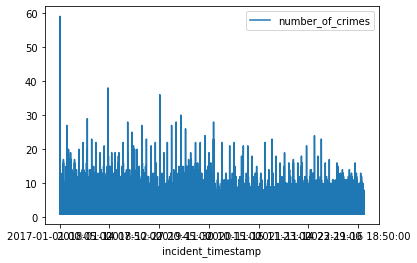

In [36]:
incident_timestamp_totals.plot();

In [37]:
incident_timestamp_totals.to_csv('incident_timestamp_totals.csv')

Convert `incident_timestamp` to datetime for neuralprophet

In [17]:
incident_timestamp_totals = incident_timestamp_totals.reset_index(level=0)
incident_timestamp_totals["incident_timestamp"] = incident_timestamp_totals["incident_timestamp"].apply(pd.to_datetime)
incident_timestamp_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306125 entries, 0 to 306124
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   incident_timestamp  306125 non-null  datetime64[ns]
 1   number_of_crimes    306125 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.7 MB


Convert `number_of_crimes` to float for neuralprophet

In [18]:
incident_timestamp_totals['number_of_crimes'] = incident_timestamp_totals['number_of_crimes'].astype(float)
incident_timestamp_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306125 entries, 0 to 306124
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   incident_timestamp  306125 non-null  datetime64[ns]
 1   number_of_crimes    306125 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 MB


# Hourly Totals

In [38]:
hourly_crime_totals = df.groupby(pd.PeriodIndex(df['incident_timestamp'], freq="H"))['incident_timestamp'].count()
hourly_crime_totals = pd.DataFrame(hourly_crime_totals)
hourly_crime_totals.columns = ['number_of_crimes']

# Set timestamp for Time Series
hourly_crime_totals.index = hourly_crime_totals.index.to_timestamp()

hourly_crime_totals.head()

,number_of_crimes
incident_timestamp,
2017-01-01 00:00:00,4
2017-01-01 01:00:00,5
2017-01-01 02:00:00,11
2017-01-01 03:00:00,7
2017-01-01 04:00:00,5


In [39]:
hourly_crime_totals.tail()

,number_of_crimes
incident_timestamp,
2022-12-31 08:00:00,16
2022-12-31 09:00:00,8
2022-12-31 10:00:00,15
2022-12-31 11:00:00,8
2022-12-31 12:00:00,9


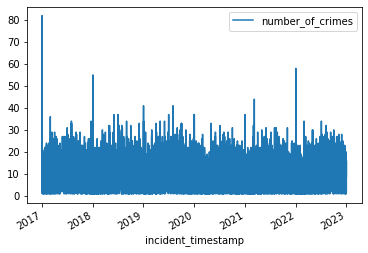

In [40]:
hourly_crime_totals.plot();

In [41]:
hourly_crime_totals.to_csv('hourly_crime_totals.csv')

# Daily Crime Totals

In [42]:
daily_crime_totals = df.groupby(pd.PeriodIndex(df['incident_timestamp'], freq="D"))['incident_timestamp'].count()
daily_crime_totals = pd.DataFrame(daily_crime_totals)
daily_crime_totals.columns = ['number_of_crimes']

# Set timestamp for Time Series
daily_crime_totals.index = daily_crime_totals.index.to_timestamp()

daily_crime_totals.head()

,number_of_crimes
incident_timestamp,
2017-01-01,343
2017-01-02,239
2017-01-03,207
2017-01-04,218
2017-01-05,182


In [43]:
daily_crime_totals.tail()

,number_of_crimes
incident_timestamp,
2022-12-27,166
2022-12-28,169
2022-12-29,197
2022-12-30,193
2022-12-31,142


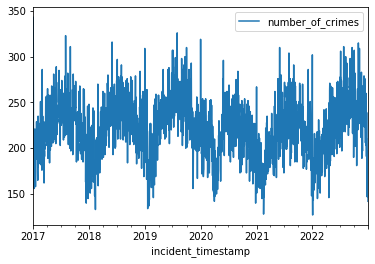

In [44]:
daily_crime_totals.plot();

In [45]:
daily_crime_totals.to_csv('daily_crime_totals.csv')

# Daily Crime Averages

In [46]:
daily_avg_reset = hourly_crime_totals.reset_index(level=0)
daily_crime_avg = daily_avg_reset.groupby(pd.PeriodIndex(daily_avg_reset['incident_timestamp'], freq="D"))['number_of_crimes'].mean().round(2)
daily_crime_avg = pd.DataFrame(daily_crime_avg)
daily_crime_avg.columns = ['avg_crimes']

# Set timestamp for Time Series
daily_crime_avg.index = daily_crime_avg.index.to_timestamp()

daily_crime_avg.head()

,avg_crimes
incident_timestamp,
2017-01-01,14.29
2017-01-02,9.96
2017-01-03,8.62
2017-01-04,9.08
2017-01-05,7.58


In [47]:
daily_crime_avg.tail()

,avg_crimes
incident_timestamp,
2022-12-27,6.92
2022-12-28,7.04
2022-12-29,8.21
2022-12-30,8.04
2022-12-31,10.92


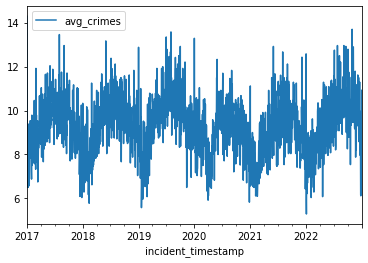

In [48]:
daily_crime_avg.plot();

In [67]:
daily_crime_avg.to_csv('daily_crime_avg.csv')

# Weekly Crime Totals

In [49]:
weekly_crime_totals = df.groupby(pd.PeriodIndex(df['incident_timestamp'], freq="W"))['incident_timestamp'].count()
weekly_crime_totals = pd.DataFrame(weekly_crime_totals)
weekly_crime_totals.columns = ['number_of_crimes']

# Remove first row from 2016 
weekly_crime_totals = weekly_crime_totals[1:]

# Set timestamp for Time Series
weekly_crime_totals.index = weekly_crime_totals.index.to_timestamp()

weekly_crime_totals.head()

,number_of_crimes
incident_timestamp,
2017-01-02,1343
2017-01-09,1410
2017-01-16,1376
2017-01-23,1465
2017-01-30,1373


In [50]:
weekly_crime_totals.tail()

,number_of_crimes
incident_timestamp,
2022-11-28,1667
2022-12-05,1781
2022-12-12,1574
2022-12-19,1311
2022-12-26,1019


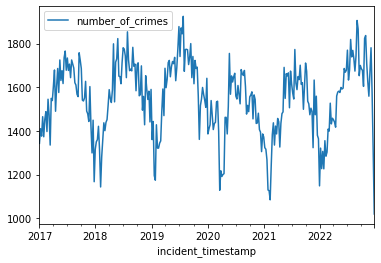

In [51]:
weekly_crime_totals.plot();

In [66]:
weekly_crime_totals.to_csv('weekly_crime_totals.csv')

# Weekly Crime Averages

In [54]:
daily_reset = daily_crime_totals.reset_index(level=0)
weekly_crime_avg = daily_reset.groupby(pd.PeriodIndex(daily_reset['incident_timestamp'], freq="W"))['number_of_crimes'].mean().round(2)
weekly_crime_avg = pd.DataFrame(weekly_crime_avg)
weekly_crime_avg.columns = ['avg_crimes']

# Began with first official week of 2017
weekly_crime_avg = weekly_crime_avg[1:]

# Set timestamp for Time Series
weekly_crime_avg.index = weekly_crime_avg.index.to_timestamp()

weekly_crime_avg.head()

,avg_crimes
incident_timestamp,
2017-01-02,191.86
2017-01-09,201.43
2017-01-16,196.57
2017-01-23,209.29
2017-01-30,196.14


In [55]:
weekly_crime_avg.tail()

,avg_crimes
incident_timestamp,
2022-11-28,238.14
2022-12-05,254.43
2022-12-12,224.86
2022-12-19,187.29
2022-12-26,169.83


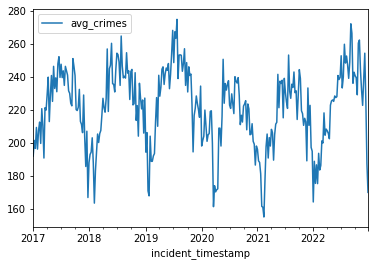

In [56]:
weekly_crime_avg.plot();

In [57]:
weekly_crime_avg.to_csv('weekly_crime_avg.csv')

# Monthly Totals

In [58]:
monthly_crime_totals = df.groupby(pd.PeriodIndex(df['incident_timestamp'], freq="M"))['incident_timestamp'].count()
monthly_crime_totals = pd.DataFrame(monthly_crime_totals)
monthly_crime_totals.columns = ['number_of_crimes']

# Set timestamp for Time Series
monthly_crime_totals.index = monthly_crime_totals.index.to_timestamp()

monthly_crime_totals.head()

,number_of_crimes
incident_timestamp,
2017-01-01,6276
2017-02-01,5770
2017-03-01,6582
2017-04-01,6838
2017-05-01,7315


In [59]:
monthly_crime_totals.tail()

,number_of_crimes
incident_timestamp,
2022-08-01,7647
2022-09-01,7561
2022-10-01,7592
2022-11-01,7215
2022-12-01,6635


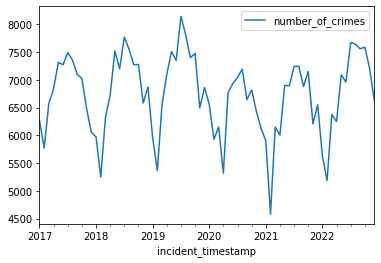

In [60]:
monthly_crime_totals.plot();

In [61]:
monthly_crime_totals.to_csv('monthly_crime_totals.csv')

# Monthly Crime Averages

In [62]:
daily_reset = daily_crime_totals.reset_index(level=0)
monthly_crime_avg = daily_reset.groupby(pd.PeriodIndex(daily_reset['incident_timestamp'], freq="M"))['number_of_crimes'].mean().round(2)
monthly_crime_avg = pd.DataFrame(monthly_crime_avg)
monthly_crime_avg.columns = ['avg_crimes']

# Set timestamp for Time Series
monthly_crime_avg.index = monthly_crime_avg.index.to_timestamp()

monthly_crime_avg.head()

,avg_crimes
incident_timestamp,
2017-01-01,202.45
2017-02-01,206.07
2017-03-01,212.32
2017-04-01,227.93
2017-05-01,235.97


In [63]:
monthly_crime_avg.tail()

,avg_crimes
incident_timestamp,
2022-08-01,246.68
2022-09-01,252.03
2022-10-01,244.90
2022-11-01,240.50
2022-12-01,214.03


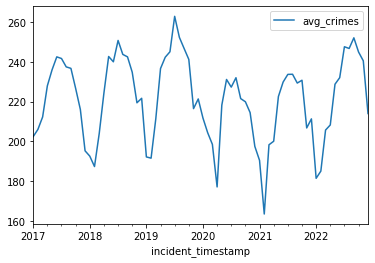

In [64]:
monthly_crime_avg.plot();

In [65]:
monthly_crime_avg.to_csv('monthly_crime_avg.csv')